In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("C:/Users/hp/Desktop/UpdatedResumeDataSet.csv")


In [5]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
df.shape

(962, 2)

In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

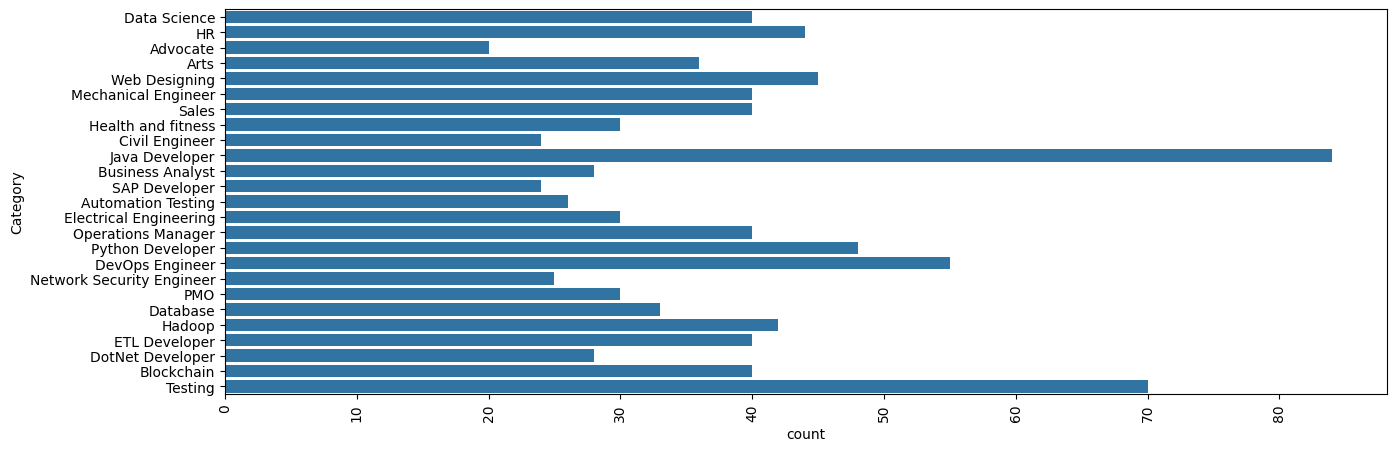

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

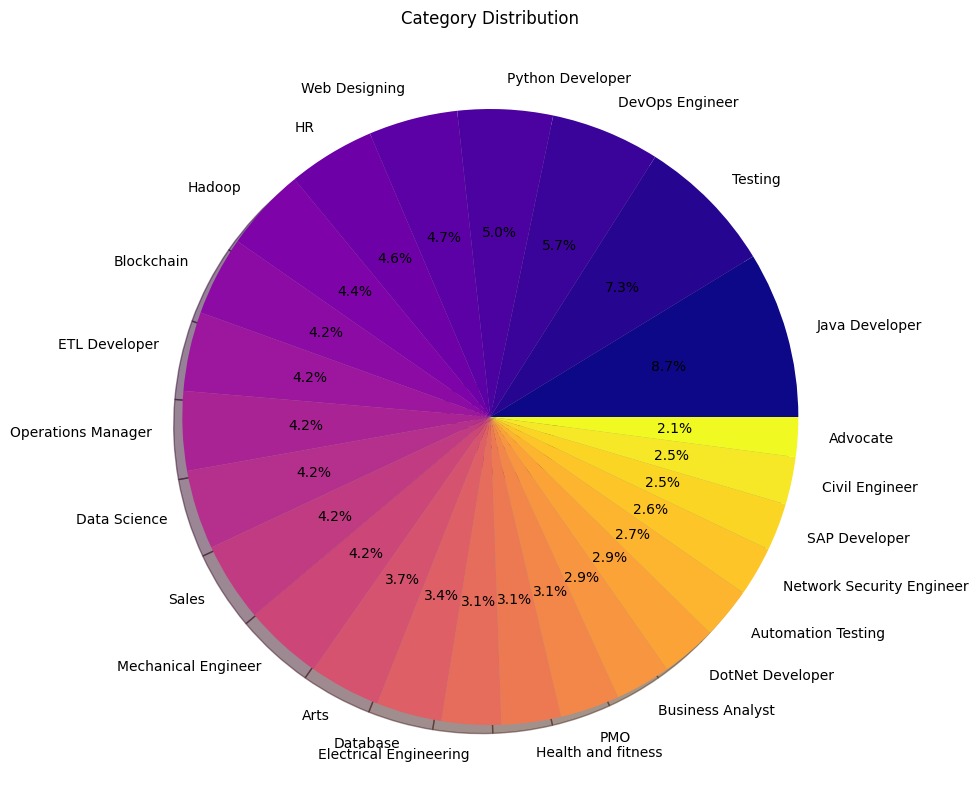

In [19]:
count = df['Category'].value_counts()
labels = count.index  
colors = plt.cm.plasma(np.linspace(0, 1, len(labels)))

plt.figure(figsize=(15,10))

plt.pie(count, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.title("Category Distribution")
plt.show()

In [20]:
df


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [22]:
df['Category'][0]

'Data Science'

In [24]:
df['Resume'][0]


'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [20]:
import re

def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)

    return cleanText

In [31]:
cleanResume("My website 263487 #$is like https://ckj and nice one")

'My website 263487 like and nice one'

In [33]:
df['Resume']=df['Resume'].apply(lambda x: cleanResume(x))

In [34]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()

In [39]:
le.fit(df['Category'])
df['Category']=le.transform(df['Category'])

In [40]:
df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32

In [41]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [42]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requredTaxt  = tfidf.transform(df['Resume'])

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)


In [48]:
X_train.shape

(769, 7351)

In [49]:
X_test.shape

(193, 7351)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf=OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred=clf.predict(X_test)
print(ypred)
print(accuracy_score(y_test,ypred))

['Java Developer' 'Java Developer' 'Java Developer' 'Hadoop'
 'Health and fitness' 'Network Security Engineer' 'Mechanical Engineer'
 'Automation Testing' 'Advocate' 'Health and fitness' 'Hadoop' 'HR'
 'Mechanical Engineer' 'Testing' 'Python Developer' 'Civil Engineer'
 'Data Science' 'Business Analyst' 'ETL Developer' 'DotNet Developer'
 'PMO' 'Arts' 'ETL Developer' 'Testing' 'Testing' 'SAP Developer' 'Sales'
 'Sales' 'Automation Testing' 'HR' 'Operations Manager' 'Arts'
 'DevOps Engineer' 'Web Designing' 'Electrical Engineering' 'Testing'
 'Database' 'HR' 'Web Designing' 'DevOps Engineer' 'Operations Manager'
 'Data Science' 'DevOps Engineer' 'PMO' 'Web Designing' 'Testing'
 'SAP Developer' 'Arts' 'Java Developer' 'Business Analyst'
 'Java Developer' 'Sales' 'Electrical Engineering' 'Civil Engineer'
 'Java Developer' 'Hadoop' 'Arts' 'PMO' 'Civil Engineer' 'HR' 'Sales'
 'Sales' 'Python Developer' 'Web Designing' 'SAP Developer'
 'Operations Manager' 'HR' 'ETL Developer' 'ETL Developer

In [17]:
import pickle 
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))            

In [23]:
import pickle

clf=pickle.load(open('clf.pkl','rb'))

cleaned_resume=cleanResume(myresume)

input_features=tfidf.transform([cleaned_resume])

prediction_id=clf.predict(input_features)[0]

category_mapping={

    15:"Java Developer",
    23:"Testing",
    8:"Devops Engineer",
    20:"Python Developer",
    24:"Web Designing",
    13:"Hadoop",
    3:"Blockchain",
    10:"Etl Developer",
    18:"Operations Manager",
    0:"Data Science",
    22:"Sales",
    16:"Mechanical Engineer",
    1:"Arts",
    7:"Database",
    11:"Electrical Engineering",
    14:"Health and Fitness",
    19:"PMO",
    4:"Business Analyst",
    9:"Dotnet Developer",
    2:"Automation Testing",
    17:"Network Security Engineer",
    21:"SAP Developer",
    5:"Civil Engineer",
    6:"Advocate",
}

category_name = category_mapping.get(prediction_id,"Unknown")
print("Predicted Category :",category_name)
print(prediction_id)
    




    

Predicted Category : Unknown
Health and fitness


In [21]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

